In [1]:
import pandas as pd
%matplotlib inline
import matplotlib as plt
pd.set_option("display.max_columns",999)

# Getting some info from CSV file

In [119]:
df = pd.read_csv("./cuentalo-search-20180427_20180513.csv",parse_dates=["created_at"])

/Users/fcucchietti/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [250]:
len(df)

2111998

In [264]:
df.head()

,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,urls,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_or_quote_id,retweet_or_quote_screen_name,retweet_or_quote_user_id,source,user_id,user_created_at,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,990380137937035265,https://twitter.com/OrianaDiAmeliee/status/990...,2018-04-28 23:59:59,2018-04-28 23:59:59+00:00,OrianaDiAmeliee,RT @Odi_sea: Con 17 años desde una cena de gra...,retweet,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,es,NaN,NaN,3176,9.900283e+17,Odi_sea,1.125412e+08,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",636716479,Mon Jul 16 05:04:26 +0000 2012,False,"Write, read, foods, dogs, blogger ‍https://t.c...",54123,1839,1556,21,Venezuela,한제원,48132,Caracas,https://onedaywithoriana.wordpress.com/,False
1,990380135638593538,https://twitter.com/alannih/status/99038013563...,2018-04-28 23:59:59,2018-04-28 23:59:59+00:00,alannih,RT @__Kylene: Demos voz y apoyo a esta compañe...,retweet,NaN,Cuéntalo,NaN,NaN,0,NaN,NaN,NaN,es,NaN,NaN,1208,9.902437e+17,__Kylene,8.149004e+08,"<a href=""http://twitter.com/download/android"" ...",546250792,Thu Apr 05 20:09:12 +0000 2012,False,El norte no olvida. \n...Se pueden robar tod...,29744,249,159,3,"Baker Street, London.",Alannih 💝💛💜,9376,NaN,NaN,False
2,990380135500181505,https://twitter.com/DiKa2Pa21/status/990380135...,2018-04-28 23:59:59,2018-04-28 23:59:59+00:00,DiKa2Pa21,RT @AlejandraTuk: Mi marido me maltrata.\nPido...,retweet,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,es,NaN,NaN,17406,9.903250e+17,AlejandraTuk,5.295888e+08,"<a href=""http://twitter.com/download/android"" ...",796195177400532993,Wed Nov 09 03:38:17 +0000 2016,False,NaN,22361,132,163,2,NaN,Diana Carolina Carre,10839,NaN,NaN,False
3,990380134715871233,https://twitter.com/FranciscoJMArau/status/990...,2018-04-28 23:59:59,2018-04-28 23:59:59+00:00,FranciscoJMArau,RT @Antiintermedio: ¿Sabéis dónde estaban hace...,retweet,NaN,LaManada,NaN,NaN,0,NaN,NaN,NaN,es,NaN,NaN,1322,9.899852e+17,Antiintermedio,2.345904e+09,"<a href=""http://twitter.com/download/android"" ...",936556720670863360,Fri Dec 01 11:24:57 +0000 2017,False,NaN,43469,213,131,1,"Cáceres, España",Francisco,41093,NaN,NaN,False
4,990380130362187776,https://twitter.com/geeeelaaaaa/status/9903801...,2018-04-28 23:59:58,2018-04-28 23:59:58+00:00,geeeelaaaaa,RT @Soy_Arbitra: Estar en un campo de fútbol a...,retweet,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,es,NaN,NaN,573,9.902613e+17,Soy_Arbitra,1.538699e+09,"<a href=""http://twitter.com/download/android"" ...",2734383970,Tue Aug 05 18:53:57 +0000 2014,False,Jugadora del Madrid Club de Fútbol Femenino ⚽,155,41,42,0,"Vallecas, Madrid",angelamesa_,209,NaN,https://www.instagram.com/angelamesa_/,False


In [273]:
df.tweet_type.unique()

array(['retweet', 'original', 'reply', 'quote'], dtype=object)

In [343]:
df.columns

Index(['id', 'tweet_url', 'created_at', 'parsed_created_at',
       'user_screen_name', 'text', 'tweet_type', 'coordinates', 'hashtags',
       'media', 'urls', 'favorite_count', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'retweet_or_quote_id',
       'retweet_or_quote_screen_name', 'retweet_or_quote_user_id', 'source',
       'user_id', 'user_created_at', 'user_default_profile_image',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'user_listed_count', 'user_location', 'user_name',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified'],
      dtype='object')

In [348]:
df.retweet_or_quote_id=df.retweet_or_quote_id.fillna(0).astype(np.int64)
df.in_reply_to_status_id=df.in_reply_to_status_id.fillna(0).astype(np.int64)

### How many tweets per 5 minutes?

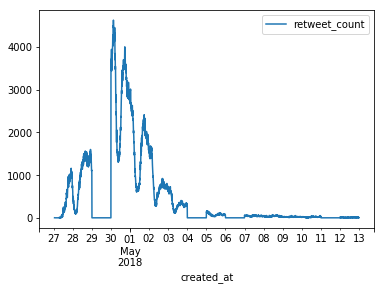

In [122]:
df[['created_at','retweet_count']].set_index('created_at').resample('5T').count().plot()

There are two days missing in the CSV? we might want to look at the json file. 

Roughly a peak of 5K tweets is a lot. We could try a smaller time window but then horizontally we'll get too many points. (2 weeks at 5 min are 4032 points, every 2 minutes we have 10080)


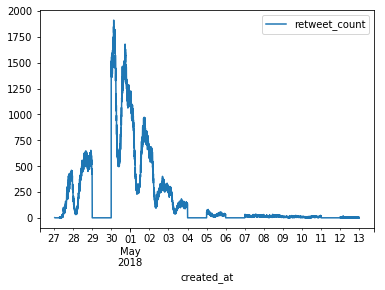

In [124]:
df[['created_at','retweet_count']].set_index('created_at').resample('2T').count().plot()

### Analysis of retweets vs...

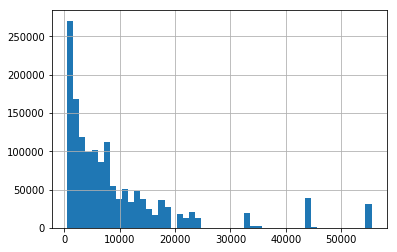

In [140]:
# How many retweets per tweet?
df[df.retweet_count>500].retweet_count.hist(bins=50)

There are a lot with fewer than 500 retweets...

In [131]:
len(df[df.retweet_count<=500])

630689

Tweets with small # of retweets are distributed nicely

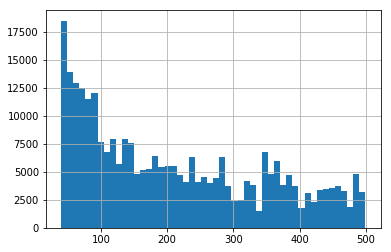

In [141]:
df[(df.retweet_count<500) & (df.retweet_count>39)].retweet_count.hist(bins=50)

### Analizing the nature of RTs

In [277]:
# cuantos tipos de tweets hay?
df.groupby('tweet_type')['id'].count()

tweet_type
original     111337
quote          8084
reply         19374
retweet     1973203
Name: id, dtype: int64

In [349]:
# cuantos retweets acumulan los replys?
replies=df[df.in_reply_to_status_id>0]
print(replies.retweet_count.sum())

63883


In [350]:
# Numero de tweets unicos que fueron retweeteados
len(df.retweet_or_quote_id.unique())

65593

In [351]:
# how do we check if the RT count is the same for each new RT?
retweets=df[df['tweet_type']=='retweet']
grouped_retweets=retweets.groupby('retweet_or_quote_id')

In [380]:
# tweet Ids que cambian el numero de RTs, los que no cambian 
(len(grouped_retweets['retweet_count'].std()[grouped_retweets['retweet_count'].std()>0]),
len(grouped_retweets['retweet_count'].std()[grouped_retweets['retweet_count'].std()==0]))

(2822, 32535)

In [381]:
grouped_retweets['retweet_count'].std()[grouped_retweets['retweet_count'].std()>0]

retweet_or_quote_id
989554972697251840      0.100248
989801589853577216      0.164349
989807397865771008      0.106600
989811233984573440      0.224529
989828567285592064      0.079305
989831887769296896      0.040893
989832869584482304      0.130189
989833471462961152      1.253005
989833781572964352      0.154303
989835175969239040      0.135229
989835963470934016      0.133659
989838641341042688      1.031656
989839247346675712      7.343900
989842625825005568      0.707107
989842935591161856      0.333333
989843974541185024      0.063725
989844061115895808      0.074124
989844299822059520      0.224857
989845444946743296      0.039936
989846763115868160      0.137685
989850774019723264      0.387244
989855760728363008      0.082338
989856551736365056      0.470871
989857321508536320      0.229416
989857492317474816      0.196116
989857597191802880      0.707107
989861828447567872      0.112503
989864554753609728      0.448963
989864640887902208      1.335748
989867554276544512     

In [385]:
### Vamos a clasificar los tweets que cambian o no sus RTs para observarlos
grouped_retweets.retweet_count.std().dropna().sort_values(ascending=False)

retweet_or_quote_id
991464409825505280    700.623534
994495599788556288    579.534600
990896349544579072    529.570540
991818513395408896    499.717871
991784392900083712    323.333529
991907915463262208    323.009336
992177026294583296    293.017860
992541961390317568    277.901188
989948689908191232    277.512085
991788720239075328    261.947767
990201907456208896    258.424676
992203314694639616    242.587631
990265452864720896    219.813247
991871539992760320    216.508588
990285709293572096    168.001208
991735320327704576    164.197185
990251871376953344    163.561052
990259278240886784    151.767575
990266465545793536    136.919583
990325049893801984    129.277499
991827719540432896    119.193593
991217730601848832    108.651209
990370802523656192    107.510113
990301881925881856    107.321699
990306246078140416    104.247551
992097239672606720    103.641015
991888394795077632    102.186011
991789885131579392    101.961495
991839836469366784     93.546909
991715556322697216     

In [356]:
# armamos una columna para cada id unico y vemos si cambia su numero de RT
RTs_with_changing_rts=pd.DataFrame(grouped_retweets['retweet_count'].std()>0)
RTs_with_changing_rts.columns=["variance_of_RT_count"]

In [357]:
# ponemos la columna en la df de retweets
retweets=retweets.merge(RTs_with_changing_rts,how="left",left_on='retweet_or_quote_id',right_index=True)

In [358]:
# chequeamos--tenemos el mismo numero de tweets unicos
len(retweets[retweets.variance_of_RT_count].retweet_or_quote_id.unique())

2822

In [359]:
# y estos 2822 tweets son RT casi 1.6M de veces
len(retweets[retweets.variance_of_RT_count])

1599676

In [377]:
# identifiquemos algunos
unidx=RTs_with_changing_rts.index[100]
retweets[retweets.retweet_or_quote_id==unidx][['created_at','retweet_count']].std()

retweet_count    0.0
dtype: float64

In [386]:
retweets[retweets.retweet_or_quote_id==991464409825505280][['created_at','retweet_count']]

,created_at,retweet_count
371922,2018-05-03 23:59:57,33117
371923,2018-05-03 23:59:56,33117
371928,2018-05-03 23:59:52,33117
371929,2018-05-03 23:59:52,33117
371930,2018-05-03 23:59:51,33117
371931,2018-05-03 23:59:51,33117
371947,2018-05-03 23:59:38,33117
371959,2018-05-03 23:59:23,33117
371967,2018-05-03 23:59:19,33117
371980,2018-05-03 23:59:06,33117


**CONCLUSION los RTcount cambian un poco pero parece un artefacto, son muy pocos y puedo tomar o el mayor numero o el mas reciente y estará OK**

Historias de un tweet:
* Original
* Original->Retweet
* Original->Quote
* Original->Reply
* Quote->Retweet
* Quote->Quote
* Quote->Reply
* Reply->Retweet
* Reply->Quote
* Reply->Reply

In [388]:
# Ahora podemos mirar en detalle los tweets originales+quotes+replies vs los retweets.
# Estan todos?
retweeted_ids_with_maxcounts=grouped_retweets['retweet_count'].max()
retweeted_ids_with_maxcounts.head()

retweet_or_quote_id
646602982713360384    118
747883568735600640     12
989554972697251840    323
989604040525910016      7
989759402767859712     32
Name: retweet_count, dtype: int64

In [392]:
originals=df[df['tweet_type']=='original']
quotes=df[df['tweet_type']=='quote']
replies=df[df['tweet_type']=='reply']
# ya tego retweets

In [406]:
# Los retweets a quien se refieren
retweeted_ids_set=set(retweets.retweet_or_quote_id.unique())
with_content_ids_set=set(list(originals.id.values)+list(quotes.id.values)+list(replies.id.values))
print("original+quote+reply ids: ",len(with_content_ids_set))
print("tweets retweeteados: ",len(retweeted_ids_set))
print("Interseccion",len(retweeted_ids_set.intersection(with_content_ids_set)))
print("Me faltan",len(retweeted_ids_set.difference(with_content_ids_set)),"tweets con contenido")

original+quote+reply ids:  138795
tweets retweeteados:  62097
Interseccion 34077
Me faltan 28020 tweets con contenido


Los que faltan serán los de los dos días que faltan???

In [411]:
# los retweets se descomponen en
print("tweets originales ",len(list(originals.id.values)))

tweets originales  111337


In [413]:
print("originales retweeteados: ",len(retweeted_ids_set.intersection( set(list(originals.id.values))  )) )
print("replies retweeteados: ",len(retweeted_ids_set.intersection( set(list(replies.id.values))  )) )
print("quotes retweeteados: ",len(retweeted_ids_set.intersection( set(list(quotes.id.values))  )) )
print("faltan retweeteados: ",len(retweeted_ids_set.intersection( set(list(df.id.values))  )))

originales retweeteados:  28696
replies retweeteados:  3746
quotes retweeteados:  1635
faltan retweeteados:  34089


In [414]:
print("originales respondidos: ",len(set(list(originals.id.values)).intersection(set(replies.in_reply_to_status_id.values))))
print("respuestas respondidas",len(set(list(replies.id.values)).intersection(set(replies.in_reply_to_status_id.values))))
print("citas respondidas",len(set(list(quotes.id.values)).intersection(set(replies.in_reply_to_status_id.values))))
print("faltan respondidos: ",len(set(replies.in_reply_to_status_id.values).intersection( set(list(df.id.values))  )))

originales respondidos:  2843
respuestas respondidas 3700
citas respondidas 66
faltan respondidos:  6613


In [415]:
print("originales citados: ",len(set(list(originals.id.values)).intersection(set(quotes.retweet_or_quote_id.values))))
print("respuestas citadas",len(set(list(replies.id.values)).intersection(set(quotes.retweet_or_quote_id.values))))
print("citas citadas",len(set(list(quotes.id.values)).intersection(set(quotes.retweet_or_quote_id.values))))
print("faltan quoteds: ",len(set(quotes.in_reply_to_status_id.values).intersection( set(list(df.id.values))  )))

originales citados:  1025
respuestas citadas 79
citas citadas 37
faltan quoteds:  0


In [ ]:
originals.head()

In [416]:
# What's the average number of RT per retweeted tweet?
retweeted_ids_with_maxcounts.mean()

44.456366652173216

In [417]:
# What's the variance?
retweeted_ids_with_maxcounts.std()

568.9789321119762

In [418]:
from scipy.stats import poisson
from scipy.special import factorial
import numpy as np
from scipy.optimize import curve_fit

In [425]:
cutoff=100

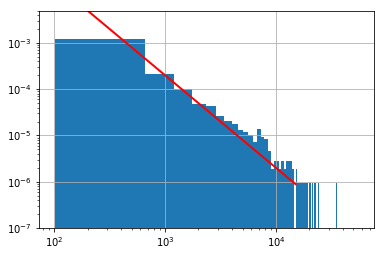

In [436]:
# Let's see if it is exponential...
x_end = 15000
fig, ax = plt.pyplot.subplots()
hist=retweeted_ids_with_maxcounts[retweeted_ids_with_maxcounts>cutoff].hist(bins=100,density=True)
x_plot = np.linspace(cutoff, x_end, 1000)
def wonk(vec,lam):
    return np.power(vec,-lam)*200 #np.exp(-vec/lam)/lam
plt.pyplot.plot(x_plot, wonk(x_plot, 2), 'r-', lw=2)  #### Roughly Power 2???
ax.set_yscale('log')
ax.set_xscale('log')
plt.pyplot.ylim((1e-7,5e-3))
plt.pyplot.show()

### Who is who

In [451]:
followers_and_retweets=pd.DataFrame()
followers_and_retweets['retweet_count']=grouped_retweets[['retweet_count','retweet_or_quote_user_id','user_followers_count']].max().groupby('retweet_or_quote_user_id')['retweet_count'].sum()
followers_and_retweets['user_followers_count']=grouped_retweets[['retweet_count','retweet_or_quote_user_id','user_followers_count']].max().groupby('retweet_or_quote_user_id')['user_followers_count'].mean()

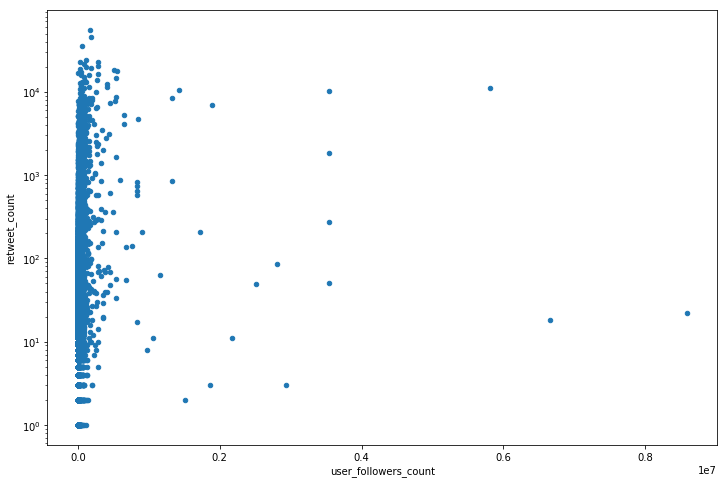

In [458]:
followers_and_retweets.plot.scatter(x='user_followers_count',y='retweet_count',figsize=(12,8)).set_yscale("log")

Most retweets are for people with few followers.

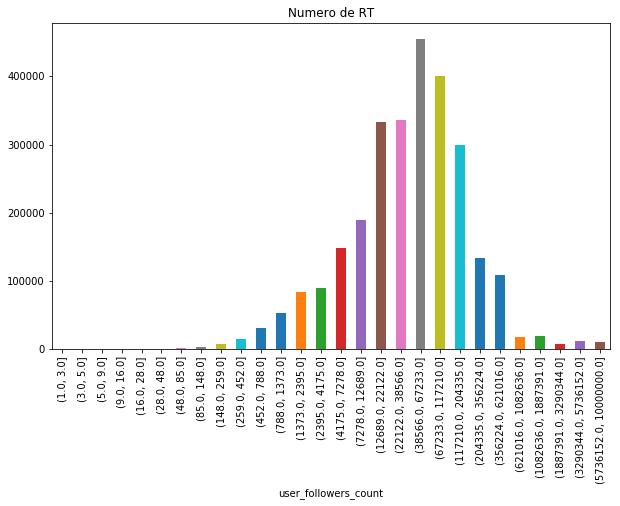

In [453]:
# partimos en rangos logaritmicos
divisiones=np.unique(np.floor(np.logspace(0,7, num=30)))
followers_and_retweets.groupby(pd.cut(followers_and_retweets['user_followers_count'], divisiones))['retweet_count'].sum().plot.bar(figsize=(10,6),title='Numero de RT')

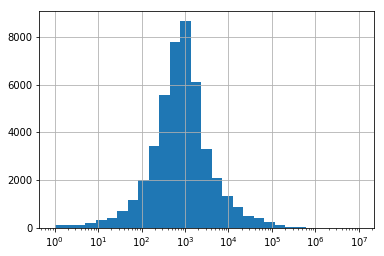

In [454]:
# Pero esto se parece a la cantidad de usuarios por bin!
followers_and_retweets['user_followers_count'].hist(bins=divisiones).set_xscale("log")

In [459]:
rt_count=followers_and_retweets.groupby(pd.cut(followers_and_retweets['user_followers_count'], divisiones))['retweet_count'].sum()
user_count=followers_and_retweets.groupby(pd.cut(followers_and_retweets['user_followers_count'], divisiones)).count()

In [462]:
rt_count

user_followers_count
(1.0, 3.0]                    116
(3.0, 5.0]                    143
(5.0, 9.0]                    309
(9.0, 16.0]                   412
(16.0, 28.0]                  831
(28.0, 48.0]                 1116
(48.0, 85.0]                 2063
(85.0, 148.0]                3577
(148.0, 259.0]               7113
(259.0, 452.0]              15612
(452.0, 788.0]              30465
(788.0, 1373.0]             52823
(1373.0, 2395.0]            83467
(2395.0, 4175.0]            89238
(4175.0, 7278.0]           148125
(7278.0, 12689.0]          189754
(12689.0, 22122.0]         332498
(22122.0, 38566.0]         336379
(38566.0, 67233.0]         455147
(67233.0, 117210.0]        400036
(117210.0, 204335.0]       299532
(204335.0, 356224.0]       134108
(356224.0, 621016.0]       109234
(621016.0, 1082636.0]       17454
(1082636.0, 1887391.0]      20017
(1887391.0, 3290344.0]       7164
(3290344.0, 5736152.0]      12439
(5736152.0, 10000000.0]     11258
Name: retweet_count, dtype:

Who are those with many followers? News agencies and some influencers

In [221]:
high_followers=df[df.user_followers_count>1000000][['user_screen_name','user_followers_count','text']]
print(len(high_followers))
high_followers

90


,user_screen_name,user_followers_count,text
25459,antena3com,1365210,La indignación por la sentencia de 'La Manada'...
37951,el_pais,6648080,El hombre que más tenía que haberme querido ti...
89047,24h_tve,1275444,Desde ayer miles de mujeres cuentan en #Twitte...
133009,Le_Figaro,2936097,"🗣 « RACONTE LE » - En Espagne, la parole des f..."
157790,20m,1365773,#Cuéntalo: las mujeres relatan en Twitter caso...
189089,elmundoes,3143267,La iniciativa #Cuéntalo lleva más de 150.000 t...
193608,el_pais,6648169,Las mujeres comparten sus historias de abusos ...
197492,A3Noticias,1700092,La indignación por la sentencia de 'La Manada'...
213341,el_pais,6648191,"""El hombre que más tenía que haberme querido t..."
266469,rmapalacios,2807557,España y el twitter mundial leyendo #cuentalo\...


In [ ]:
df[df.retweet_count>50000][['user_screen_name','user_followers_count','text']]

In [9]:
len(df.retweet_or_quote_user_id.unique())

47661

In [11]:
ret=set(df.retweet_or_quote_user_id.unique())
users=set(df.user_id.unique())

In [12]:
print(len(users))
print(len(ret))

602750
47661


In [13]:
len(ret.intersection(users))

41727

In [3]:
df.text

0          RT @Odi_sea: Con 17 años desde una cena de gra...
1          RT @__Kylene: Demos voz y apoyo a esta compañe...
2          RT @AlejandraTuk: Mi marido me maltrata.\nPido...
3          RT @Antiintermedio: ¿Sabéis dónde estaban hace...
4          RT @Soy_Arbitra: Estar en un campo de fútbol a...
5          RT @Misseneverland: 21 años #cuéntalo: un "ami...
6          RT @martolius: Tengo 22 años y una leve discap...
7          RT @poniatiya: Un profesor me violó durante do...
8          RT @protestona1: Lo más triste de este HT es q...
9          RT @martolius: Tengo 22 años y una leve discap...
10         RT @AndreaaSantorum: Pensé en callarme por la ...
11         17 años.Vuelvo a casa con miedo. Se me acerca ...
12         RT @ggv_09: No es que todos seáis machistas\nE...
13         RT @sheradoram: Alguien la habrá recordado seg...
14         RT @merypo222: Porque todas hemos caminado ráp...
15         RT @raaqueleta: Que aun siendo adulta tus padr...
16         RT @MaryanCM:

## Getting user location

In [ ]:
# attempt 1: From the data
# http://www.mikaelbrunila.fi/2017/03/27/scraping-extracting-mapping-geodata-twitter/

import json
# Tweets are stored in in file "fname". In the file used for this script, 
# each tweet was stored on one line
fname = "../../File requests/cuentalos/Aniol-Maria-cuentalo-search-20180427_20180513.jsonl"
with open(fname, 'r') as f:
    
    #Create dictionary to later be stored as JSON. All data will be included
    # in the list 'data'
    users_with_geodata = {
        "data": []
    }
    all_users = []
    total_tweets = 0
    geo_tweets  = 0
    for line in f:
        tweet = json.loads(line)
        if tweet['user']['id']:
            total_tweets += 1 
            user_id = tweet['user']['id']
            if user_id not in all_users:
                all_users.append(user_id)
                
                #Give users some data to find them by. User_id listed separately 
                # to make iterating this data later easier
                user_data = {
                    "user_id" : tweet['user']['id'],
                    "features" : {
                        "name" : tweet['user']['name'],
                        "id": tweet['user']['id'],
                        "screen_name": tweet['user']['screen_name'],
                        "tweets" : 1,
                        "location": tweet['user']['location'],
                    }
                }
                #Iterate through different types of geodata to get the variable primary_geo
                if tweet['coordinates']:
                    user_data["features"]["primary_geo"] = str(tweet['coordinates'][tweet['coordinates'].keys()[1]][1]) + ", " + str(tweet['coordinates'][tweet['coordinates'].keys()[1]][0])
                    user_data["features"]["geo_type"] = "Tweet coordinates"
                elif tweet['place']:
                    user_data["features"]["primary_geo"] = tweet['place']['full_name'] + ", " + tweet['place']['country']
                    user_data["features"]["geo_type"] = "Tweet place"
                else:
                    user_data["features"]["primary_geo"] = tweet['user']['location']
                    user_data["features"]["geo_type"] = "User location"
                #Add only tweets with some geo data to .json. Comment this if you want to include all tweets.
                if user_data["features"]["primary_geo"]:
                    users_with_geodata['data'].append(user_data)
                    geo_tweets += 1
            
            #If user already listed, increase their tweet count
            elif user_id in all_users:
                for user in users_with_geodata["data"]:
                    if user_id == user["user_id"]:
                        user["features"]["tweets"] += 1
    
    #Count the total amount of tweets for those users that had geodata            
    for user in users_with_geodata["data"]:
        geo_tweets = geo_tweets + user["features"]["tweets"]
    #Get some aggregated numbers on the data
    print "The file included " + str(len(all_users)) + " unique users who tweeted with or without geo data"
    print "The file included " + str(len(users_with_geodata['data'])) + " unique users who tweeted with geo data, including 'location'"
    print "The users with geo data tweeted " + str(geo_tweets) + " out of the total " + str(total_tweets) + " of tweets."
# Save data to JSON file
#with open('Blackstone_users_geo.json', 'w') as fout:
#    fout.write(json.dumps(users_with_geodata, indent=4))

In [ ]:
# attempt 2: 
# https://arxiv.org/pdf/1403.2345.pdf


In [98]:
import json

In [99]:
tweetfile=open("../../File requests/cuentalos/Aniol-Maria-cuentalo-search-20180427_20180513.jsonl")

In [104]:
tweets={}
for idx,line in enumerate(tweetfile):
    if idx>100000:
        break
    tweet=json.loads(line)
    tweets[tweet['id']]=extractInfo(tweet)

In [33]:
keys = set(tweet.keys())
for k in tweets:
    keys=keys.union(set(tweets[k].keys()))

In [101]:
def extractInfo(tweet):
    tweetInfo={}
    tweetInfo['id']=tweet['id']
    tweetInfo['created_at']=tweet['created_at']
    tweetInfo['quote_count']=tweet['quote_count'] if 'quote_count' in tweet else None
    tweetInfo['retweet_count']=tweet['retweet_count']
    tweetInfo['favorite_count']=tweet['favorite_count']
    tweetInfo['statuses_count']=tweet['user']['statuses_count']
    tweetInfo['followers_count']=tweet['user']['followers_count']
    tweetInfo['location']=tweet['user']['location']
    tweetInfo['time_zone']=tweet['user']['time_zone']
    tweetInfo['in_reply_to_status_id']=tweet['in_reply_to_status_id']
    if tweet['coordinates']!=None:
        tweetInfo['lat']=tweet['coordinates']['coordinates'][0]
        tweetInfo['lon']=tweet['coordinates']['coordinates'][1]
    else:
        tweetInfo['lat']=None
        tweetInfo['lon']=None
    if tweet['coordinates']!=None:
        tweetInfo['lat']=tweet['coordinates']['coordinates'][0]
        tweetInfo['lon']=tweet['coordinates']['coordinates'][1]
    else:
        tweetInfo['lat']=None
        tweetInfo['lon']=None 
    if tweet['place']!=None:
        tweetInfo['country']=tweet['place']['country']
    else:
        tweetInfo['country']=None
    if 'quoted_status_id' in tweet:
        tweetInfo['quoted_status_id']=tweet['quoted_status_id']
    else:
        tweetInfo['quoted_status_id']=None     
    if 'retweeted_status' in tweet and tweet['retweeted_status']!=None:
        tweetInfo['retweeted_status_id']=tweet['retweeted_status']['id']
    else:
        tweetInfo['retweeted_status_id']=None
    if tweetInfo['in_reply_to_status_id']!=None:
        tweetInfo['path']=tweetInfo['in_reply_to_status_id']
    elif tweetInfo['quoted_status_id']!=None:
        tweetInfo['path']=tweetInfo['quoted_status_id']
    elif tweetInfo['retweeted_status_id']!=None:
        tweetInfo['path']=tweetInfo['retweeted_status_id']
    else:
        tweetInfo['path']=tweetInfo['id']
    return tweetInfo

In [69]:
keys

{'contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'metadata',
 'place',
 'possibly_sensitive',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'truncated',
 'user'}

In [73]:
list(tweets.keys())[:10]

[990380137937035265,
 990380135638593538,
 990380135500181505,
 990380134715871233,
 990380130362187776,
 990380129162616833,
 990380128361418752,
 990380127992340480,
 990380127627415553,
 990380126960537600]

In [74]:
tweets[990380129162616833]

{'id': 990380129162616833,
 'created_at': 'Sat Apr 28 23:59:57 +0000 2018',
 'quote_count': None,
 'retweet_count': 7,
 'favorite_count': 0,
 'statuses_count': 98361,
 'followers_count': 1515,
 'location': 'the maze; tree hill + Dereck.',
 'time_zone': 'Pacific Time (US & Canada)',
 'in_reply_to_status_id': None,
 'lat': None,
 'lon': None,
 'country': None,
 'quoted_status_id': None,
 'retweeted_status_id': 990343607973445632}

In [105]:
uno=pd.DataFrame(tweets).transpose()

In [97]:
uno.to_csv("/Users/fcucchietti/tmp/paths.csv")

In [106]:
len(uno)

100001

In [110]:
uno['fecha']=pd.to_datetime(uno.created_at)

In [107]:
uno.head()

,country,created_at,favorite_count,followers_count,id,in_reply_to_status_id,lat,location,lon,path,quote_count,quoted_status_id,retweet_count,retweeted_status_id,statuses_count,time_zone
990360195225260033,None,Sat Apr 28 22:40:45 +0000 2018,0,56,990360195225260033,None,None,,None,990012995760721921,None,None,14,990012995760721921,3058,None
990360193887297543,None,Sat Apr 28 22:40:44 +0000 2018,0,333,990360193887297543,None,None,En Itaca.,None,990201907456208896,None,None,54568,990201907456208896,4653,Santiago
990360192754823169,None,Sat Apr 28 22:40:44 +0000 2018,0,451,990360192754823169,None,None,Ciudad de Gotham.,None,990238691602944000,None,None,6,990238691602944000,17222,None
990360191429414912,None,Sat Apr 28 22:40:44 +0000 2018,0,1200,990360191429414912,None,None,Spain,None,990359962659573760,None,None,4,990359962659573760,3322,Madrid
990360190695411714,None,Sat Apr 28 22:40:44 +0000 2018,0,200,990360190695411714,None,None,Esteribar. EH,None,990148918725005313,None,None,47,990148918725005313,49603,None
